In [1]:
# Load packages and other dependencies
import pyam
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import glob
import os

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Load and downselect the data

In [2]:
# Load data V1.1 - Global
path = 'C:/data/ar6_data/' ### Change path to your local directory
data_file = pd.read_csv(path +"AR6_Scenarios_Database_World_v1.1.csv")

# pyam data_file
df_ar6_GB = pyam.IamDataFrame(data_file)

In [3]:
df_ar6_GB

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (109)
 * scenario : 1, 1.5C, 1.5C A, 1.5C B, 1.5C C, ... peak2025_DemandLow_FossilLow_TechHigh (939)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1393)
   unit     : %, EJ, EJ/yr, GW, GW/yr, GWh, GWh/yr, ... years (68)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)

In [4]:
# pyam the metadata
df_ar6_GB.load_meta(path + "AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",
sheet_name = "meta")


[WARNING] 01:56:00 - pyam.core: Ignoring meta indicators for the following scenarios:
       model              scenario
0  Reference                  CEDS
1  Reference             EDGAR AR6
2  Reference           EMBERS 2020
3  Reference              IEA 2019
4  Reference  Solar-Wind-composite
...


In [5]:
# Filter the GB data for vetted scenarios
df_ar6_GB_vetted = df_ar6_GB.filter(
    Vetting_historical = "Pass"
)
df_ar6_GB_vetted


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (78)
 * scenario : SSP1-26, SSP1-34, SSP1-45, SSP1-Baseline, SSP4-26, ... SSP4-19 (707)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1376)
   unit     : %, EJ, EJ/yr, GW, GW/yr, GWh, GWh/yr, ... years (65)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C3, C5, C6, C7, C4, C1, no-climate-assessment, C2, C8 (9)
   Category_name (object) C3: limit warming to 2°C (>67%), ... (9)
   Category_subset (object) C3y_+veGHGs, C5, C6, C7, C4, C1a_NZGHGs, ... C8 (11)
   Subset_Ch4 (object) Limit to 2C (>67%) immediate 2020 action, ... (6)
   Category_Vetting_historical (object) C3, C5, C6, C7, C4, C1, ... C8 (9)
   ...

In [6]:
# Filtering GB for scenarios with category allocation 
df_ar6_GB_vetted_c1 = df_ar6_GB_vetted.filter(
    Category = ["C1"]
)
df_ar6_GB_vetted_c1

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.1, AIM/CGE 2.2, AIM/Hub-Global 2.0, ... WITCH-GLOBIOM 4.4 (24)
 * scenario : CD-LINKS_NPi2020_400, EN_NPi2020_300f, ... CD-LINKS_NPi2020_1000 (78)
Timeseries data coordinates:
   region   : World (1)
   variable : ... (1243)
   unit     : W/m^2, dimensionless, Mt CH4/yr, Mt CO2/yr, ... bn vkm/yr (62)
   year     : 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, ... 2100 (106)
Meta indicators:
   Category (object) C1 (1)
   Category_name (object) ... (1)
   Category_subset (object) C1a_NZGHGs, C1b_+veGHGs (2)
   Subset_Ch4 (object) ... (1)
   Category_Vetting_historical (object) C1 (1)
   ...

In [7]:
# Check the number of scenario in the BG data under each of the categories in the metadata
df_ar6_GB_vetted_c1.meta.Category.value_counts()
# It should be 
# C1     97

Category
C1    97
Name: count, dtype: int64

# 2) CCS Use

In [8]:
vars = [
# 'Carbon Sequestration|CCS|Fossil' # Total CO2 captured from all fossil fuel sources across sectors
# 'Carbon Sequestration|CCS|Fossil|Energy', # CO2 captured specifically from fossil energy use (excludes industrial processes)
'Carbon Sequestration|CCS|Fossil|Energy|Supply', # CO2 captured from fossil fuel sources used for energy production #######
# 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Electricity' # CO2 captured from coal and gas power plants
# 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Liquids' # CO2 captured during production of liquid fuels from fossil sources
# 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Gases' # CO2 captured during natural gas processing and synthetic gas production
# 'Carbon Sequestration|CCS|Fossil|Energy|Supply|Hydrogen' # CO2 captured during hydrogen production from fossil fuels (mainly SMR)
'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry' # CO2 captured from burning fossil fuels for industrial heat/power #######
'Carbon Sequestration|CCS|Industrial Processes' # CO2 captured from non-combustion chemical reactions in manufacturing ######
'Carbon Sequestration|CCS|Fossil|Industrial Processes' # CO2 captured from industrial processes using fossil feedstocks #####
]

In [33]:
plt.style.use('seaborn-v0_8-whitegrid')  


In [34]:
_data = df_ar6_GB_vetted_c1.filter(variable = vars)

[INFO] 02:06:29 - pyam.plotting: >=13 labels, not applying legend


<Axes: title={'center': 'Carbon Sequestration|CCS'}, xlabel='Year', ylabel='Mt CO2/yr'>

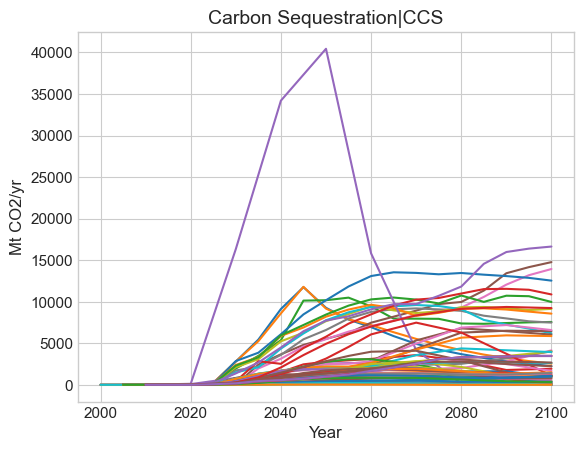

In [35]:
# All variables.. messy picture.. 

_data.plot(title = "Carbon Sequestration|CCS", color = "scenario")

[INFO] 02:06:30 - pyam.plotting: >=13 labels, not applying legend


<Axes: title={'center': 'Carbon Sequestration|CCS|Industrial Processes'}, xlabel='Year', ylabel='Mt CO2/yr'>

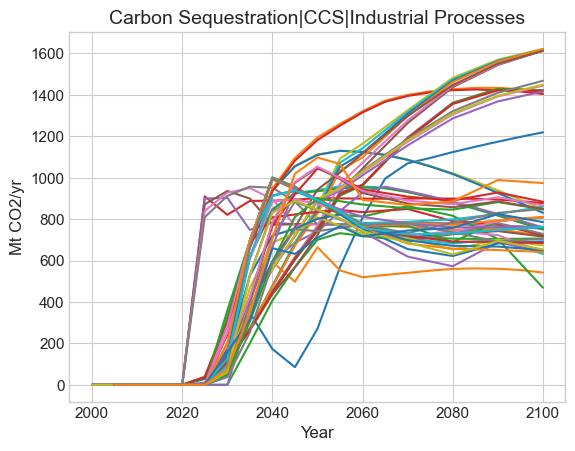

In [36]:
df_ar6_GB_vetted_c1.filter(variable =  'Carbon Sequestration|CCS|Industrial Processes').plot( title = "Carbon Sequestration|CCS|Industrial Processes", color = "scenario")

In [37]:
num_scenarios_CCS_IndustrialProcesses = df_ar6_GB_vetted_c1.filter(variable =  'Carbon Sequestration|CCS|Industrial Processes').scenario

In [38]:
len(num_scenarios_CCS_IndustrialProcesses)

52

<Axes: title={'center': 'Carbon Sequestration|CCS|Fossil|Industrial Processes'}, xlabel='Year', ylabel='Mt CO2/yr'>

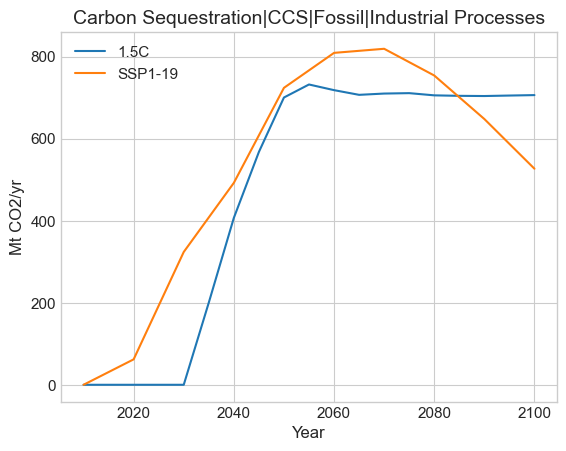

In [39]:
df_ar6_GB_vetted_c1.filter(variable = 'Carbon Sequestration|CCS|Fossil|Industrial Processes').plot( title = "Carbon Sequestration|CCS|Fossil|Industrial Processes", color = "scenario")

In [40]:
df_ar6_GB_vetted_c1.filter(variable = 'Carbon Sequestration|CCS|Fossil|Industrial Processes').timeseries()

,,,,,2010,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,
AIM/Hub-Global 2.0,1.5C,World,Carbon Sequestration|CCS|Fossil|Industrial Processes,Mt CO2/yr,0.0,0.0,0.0,0.0,0.000,200.3193,406.8706,567.56,700.2626,732.0007,718.2076,706.7685,709.8993,710.9024,705.5287,704.3459,703.8711,705.0553,706.130
GCAM 4.2,SSP1-19,World,Carbon Sequestration|CCS|Fossil|Industrial Processes,Mt CO2/yr,0.0,NaN,62.0,NaN,323.755,NaN,492.2500,NaN,723.8380,NaN,809.0850,NaN,819.0410,NaN,753.9090,NaN,647.8380,NaN,526.688


[INFO] 02:06:30 - pyam.plotting: >=13 labels, not applying legend


<Axes: title={'center': 'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry'}, xlabel='Year', ylabel='Mt CO2/yr'>

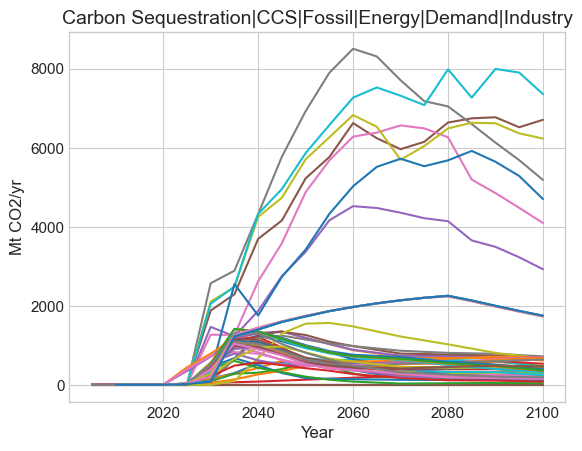

In [41]:
df_ar6_GB_vetted_c1.filter(variable = 'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry').plot( title = "Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry", color = "scenario")

In [42]:
num_scenarios_CCS_Fossil_Energy_Demand_Industry = df_ar6_GB_vetted_c1.filter(variable = 'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry').scenario

In [43]:
len(num_scenarios_CCS_Fossil_Energy_Demand_Industry)

51

[INFO] 02:06:31 - pyam.plotting: >=13 labels, not applying legend


<Axes: title={'center': 'Carbon Sequestration|CCS|Fossil|Energy|Supply'}, xlabel='Year', ylabel='Mt CO2/yr'>

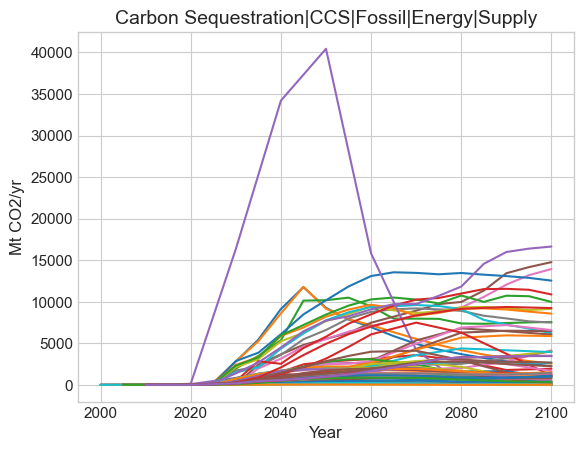

In [44]:
df_ar6_GB_vetted_c1.filter(variable = 'Carbon Sequestration|CCS|Fossil|Energy|Supply').plot( title = 'Carbon Sequestration|CCS|Fossil|Energy|Supply', color = "scenario")

In [45]:
num_CCS_fossil_energy = df_ar6_GB_vetted_c1.filter(variable = 'Carbon Sequestration|CCS|Fossil|Energy|Supply').scenario

In [46]:
len(num_CCS_fossil_energy)

55

In [47]:
vars2 = [
    'Carbon Sequestration|CCS|Fossil|Energy|Supply', # CO2 captured from fossil fuel sources used for energy production #######
'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry' # CO2 captured from burning fossil fuels for industrial heat/power ########
]

[INFO] 02:06:31 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

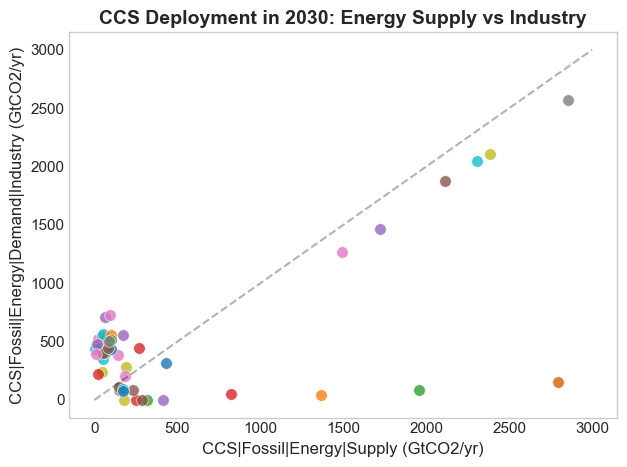

[INFO] 02:06:32 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

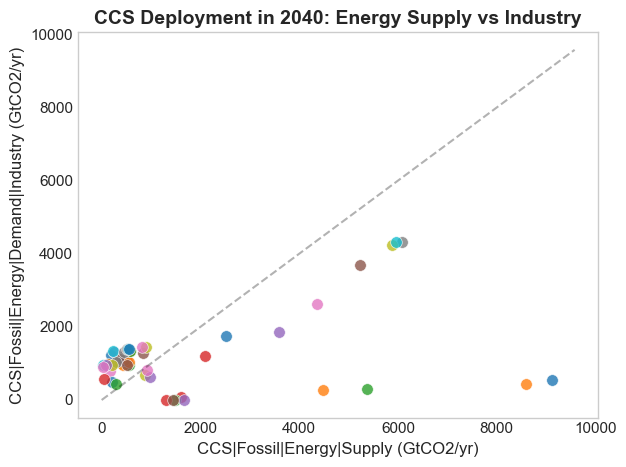

[INFO] 02:06:32 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

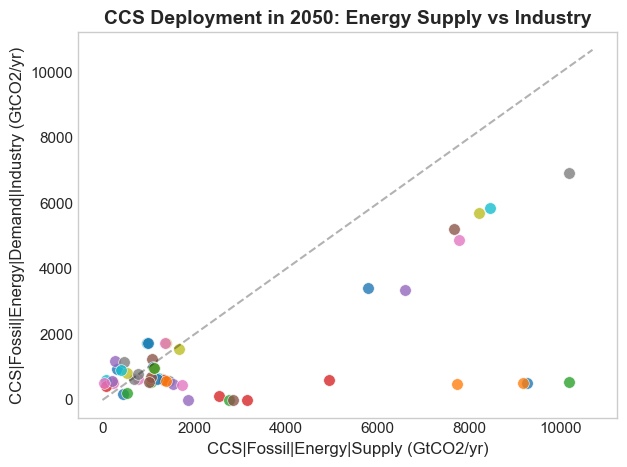

[INFO] 02:06:33 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

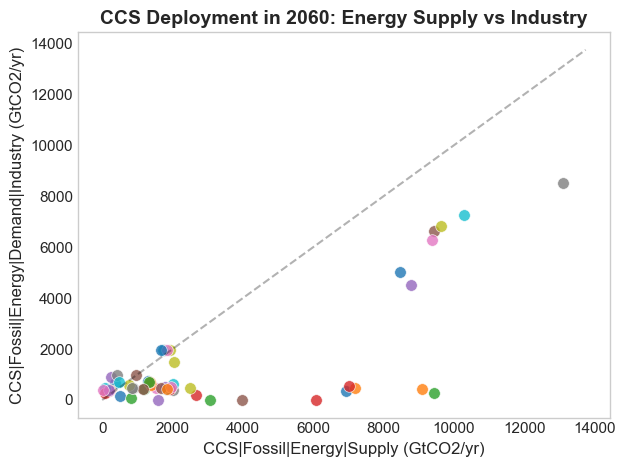

[INFO] 02:06:33 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

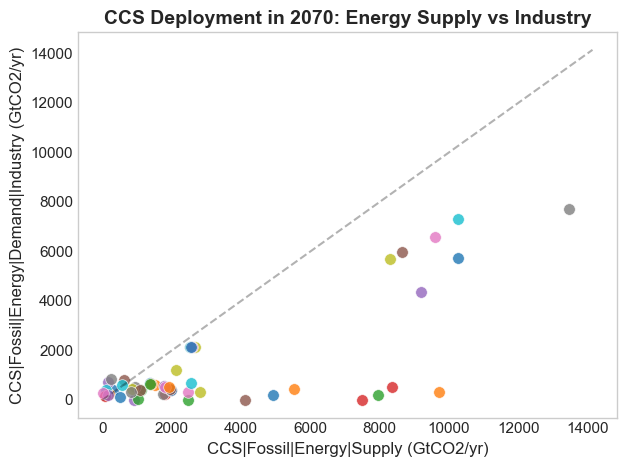

[INFO] 02:06:33 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

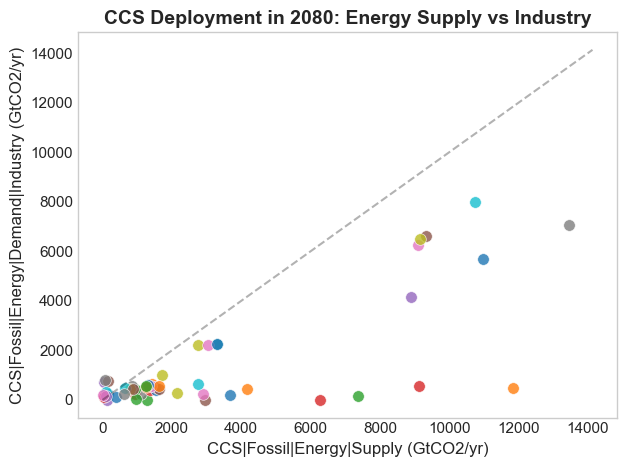

[INFO] 02:06:34 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

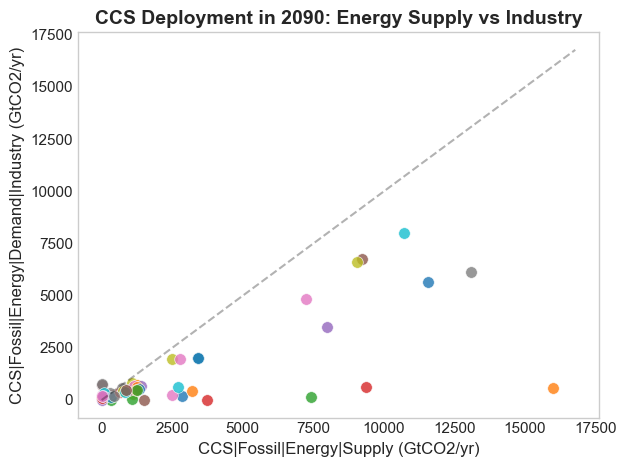

[INFO] 02:06:34 - pyam.plotting: >=13 labels, not applying legend


<Figure size 800x600 with 0 Axes>

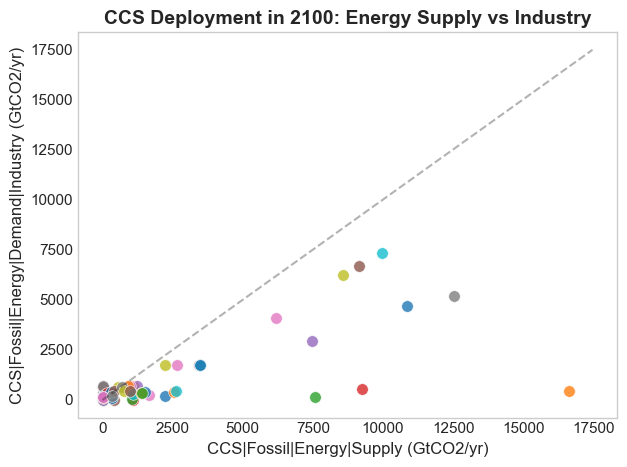

In [48]:
decades = [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]

plt.style.use('seaborn-v0_8-whitegrid')  

for year in decades:
    plt.figure(figsize=(8, 6))
    
    _data2 = df_ar6_GB_vetted_c1.filter(variable=vars2, year=year)
    
    ax = _data2.plot.scatter(
        x='Carbon Sequestration|CCS|Fossil|Energy|Supply',
        y='Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry',
        color="scenario",
        title=f'CCS|Energy|Supply vs CCS|Fossil|Energy|Demand|Industry ({year})',
        s=70,  
        alpha=0.8,  
        edgecolor='white',  #
        linewidth=0.5
    )
    
    ax.grid(False)
    
    plt.xlabel('CCS|Fossil|Energy|Supply (GtCO2/yr)', fontsize=12)
    plt.ylabel('CCS|Fossil|Energy|Demand|Industry (GtCO2/yr)', fontsize=12)
    
    plt.title(f'CCS Deployment in {year}: Energy Supply vs Industry', fontsize=14, fontweight='bold')
    
    max_val = max(ax.get_xlim()[1], ax.get_ylim()[1])
    plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()